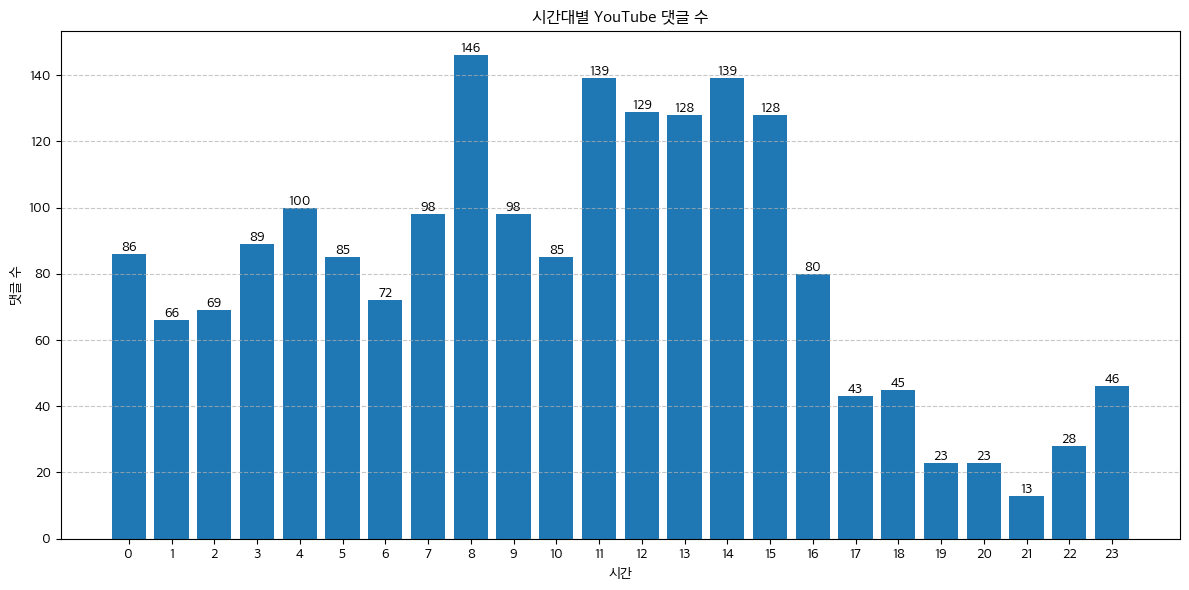

분석 결과가 'youtube_comments_time_analysis.png' 파일로 저장되었습니다.


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from datetime import datetime

# CSV 파일들이 있는 디렉토리 경로
#directories = ['디저스', '입시맘', '티처스 외전 및 티저']
directories = ['티처스 외전 및 티저']
# 모든 CSV 파일에서 데이터 읽기
all_comments = []

for directory in directories:
    if not os.path.exists(directory):
        print(f"경고: '{directory}' 디렉토리를 찾을 수 없습니다.")
        continue
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            try:
                df = pd.read_csv(file_path)
                if 'Published At' in df.columns:
                    all_comments.extend(df['Published At'].tolist())
                else:
                    print(f"경고: '{file_path}' 파일에 'Published At' 열이 없습니다.")
            except Exception as e:
                print(f"오류: '{file_path}' 파일을 읽는 중 문제가 발생했습니다: {str(e)}")

if not all_comments:
    print("오류: 분석할 댓글 데이터가 없습니다.")
else:
    # 시간 파싱 및 시간대별 집계
    hour_counts = [0] * 24

    for timestamp in all_comments:
        try:
            dt = datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%SZ')
            hour_counts[dt.hour] += 1
        except ValueError:
            print(f"경고: 잘못된 timestamp 형식 - {timestamp}")

    # 시각화
    plt.figure(figsize=(12, 6))
    plt.bar(range(24), hour_counts)
    plt.title('시간대별 YouTube 댓글 수')
    plt.xlabel('시간')
    plt.ylabel('댓글 수')
    plt.xticks(range(24))
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 각 막대 위에 값 표시
    for i, count in enumerate(hour_counts):
        plt.text(i, count, str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig('youtube_comments_time_analysis.png')
    plt.show()

    print("분석 결과가 'youtube_comments_time_analysis.png' 파일로 저장되었습니다.")

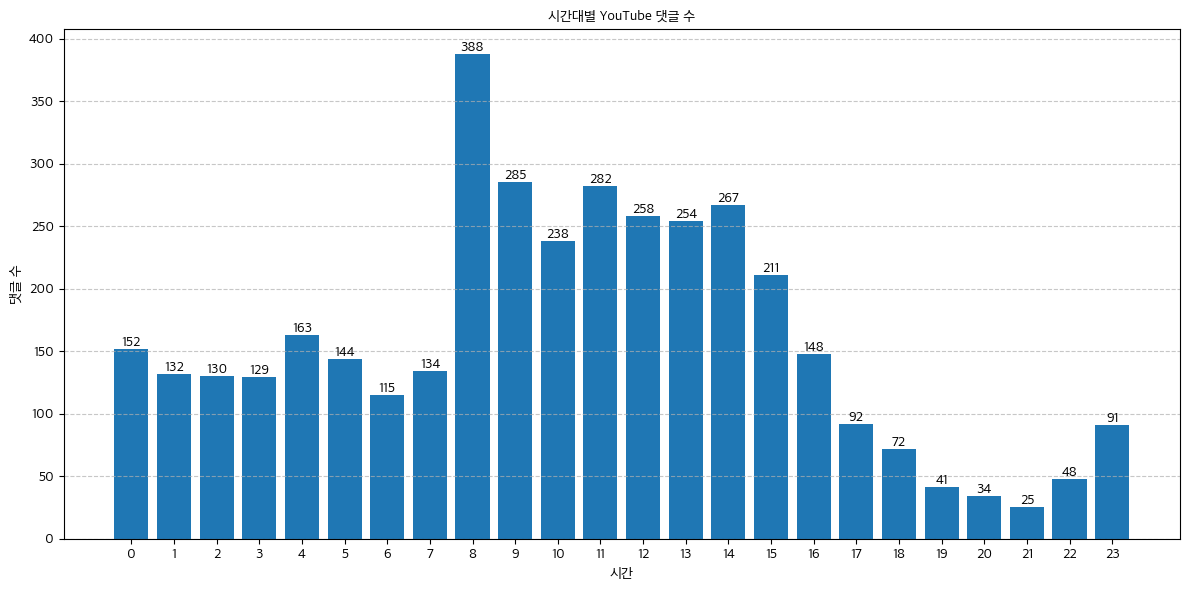

분석 결과가 'youtube_comments_time_analysis.png' 파일로 저장되었습니다.


In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Mac에서 사용 가능한 한글 폰트 찾기
# 아래 폰트 중 하나를 선택하거나, 시스템에 설치된 다른 한글 폰트를 사용할 수 있습니다.
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'  # Apple SD Gothic Neo
# font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # Apple Gothic

# 폰트 설정
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 시각화 코드
plt.figure(figsize=(12, 6))
plt.bar(range(24), hour_counts)
plt.title('시간대별 YouTube 댓글 수', fontproperties=font_prop)
plt.xlabel('시간', fontproperties=font_prop)
plt.ylabel('댓글 수', fontproperties=font_prop)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 값 표시
for i, count in enumerate(hour_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontproperties=font_prop)

plt.tight_layout()
plt.savefig('youtube_comments_time_analysis.png', dpi=300)
plt.show()

print("분석 결과가 'youtube_comments_time_analysis.png' 파일로 저장되었습니다.")

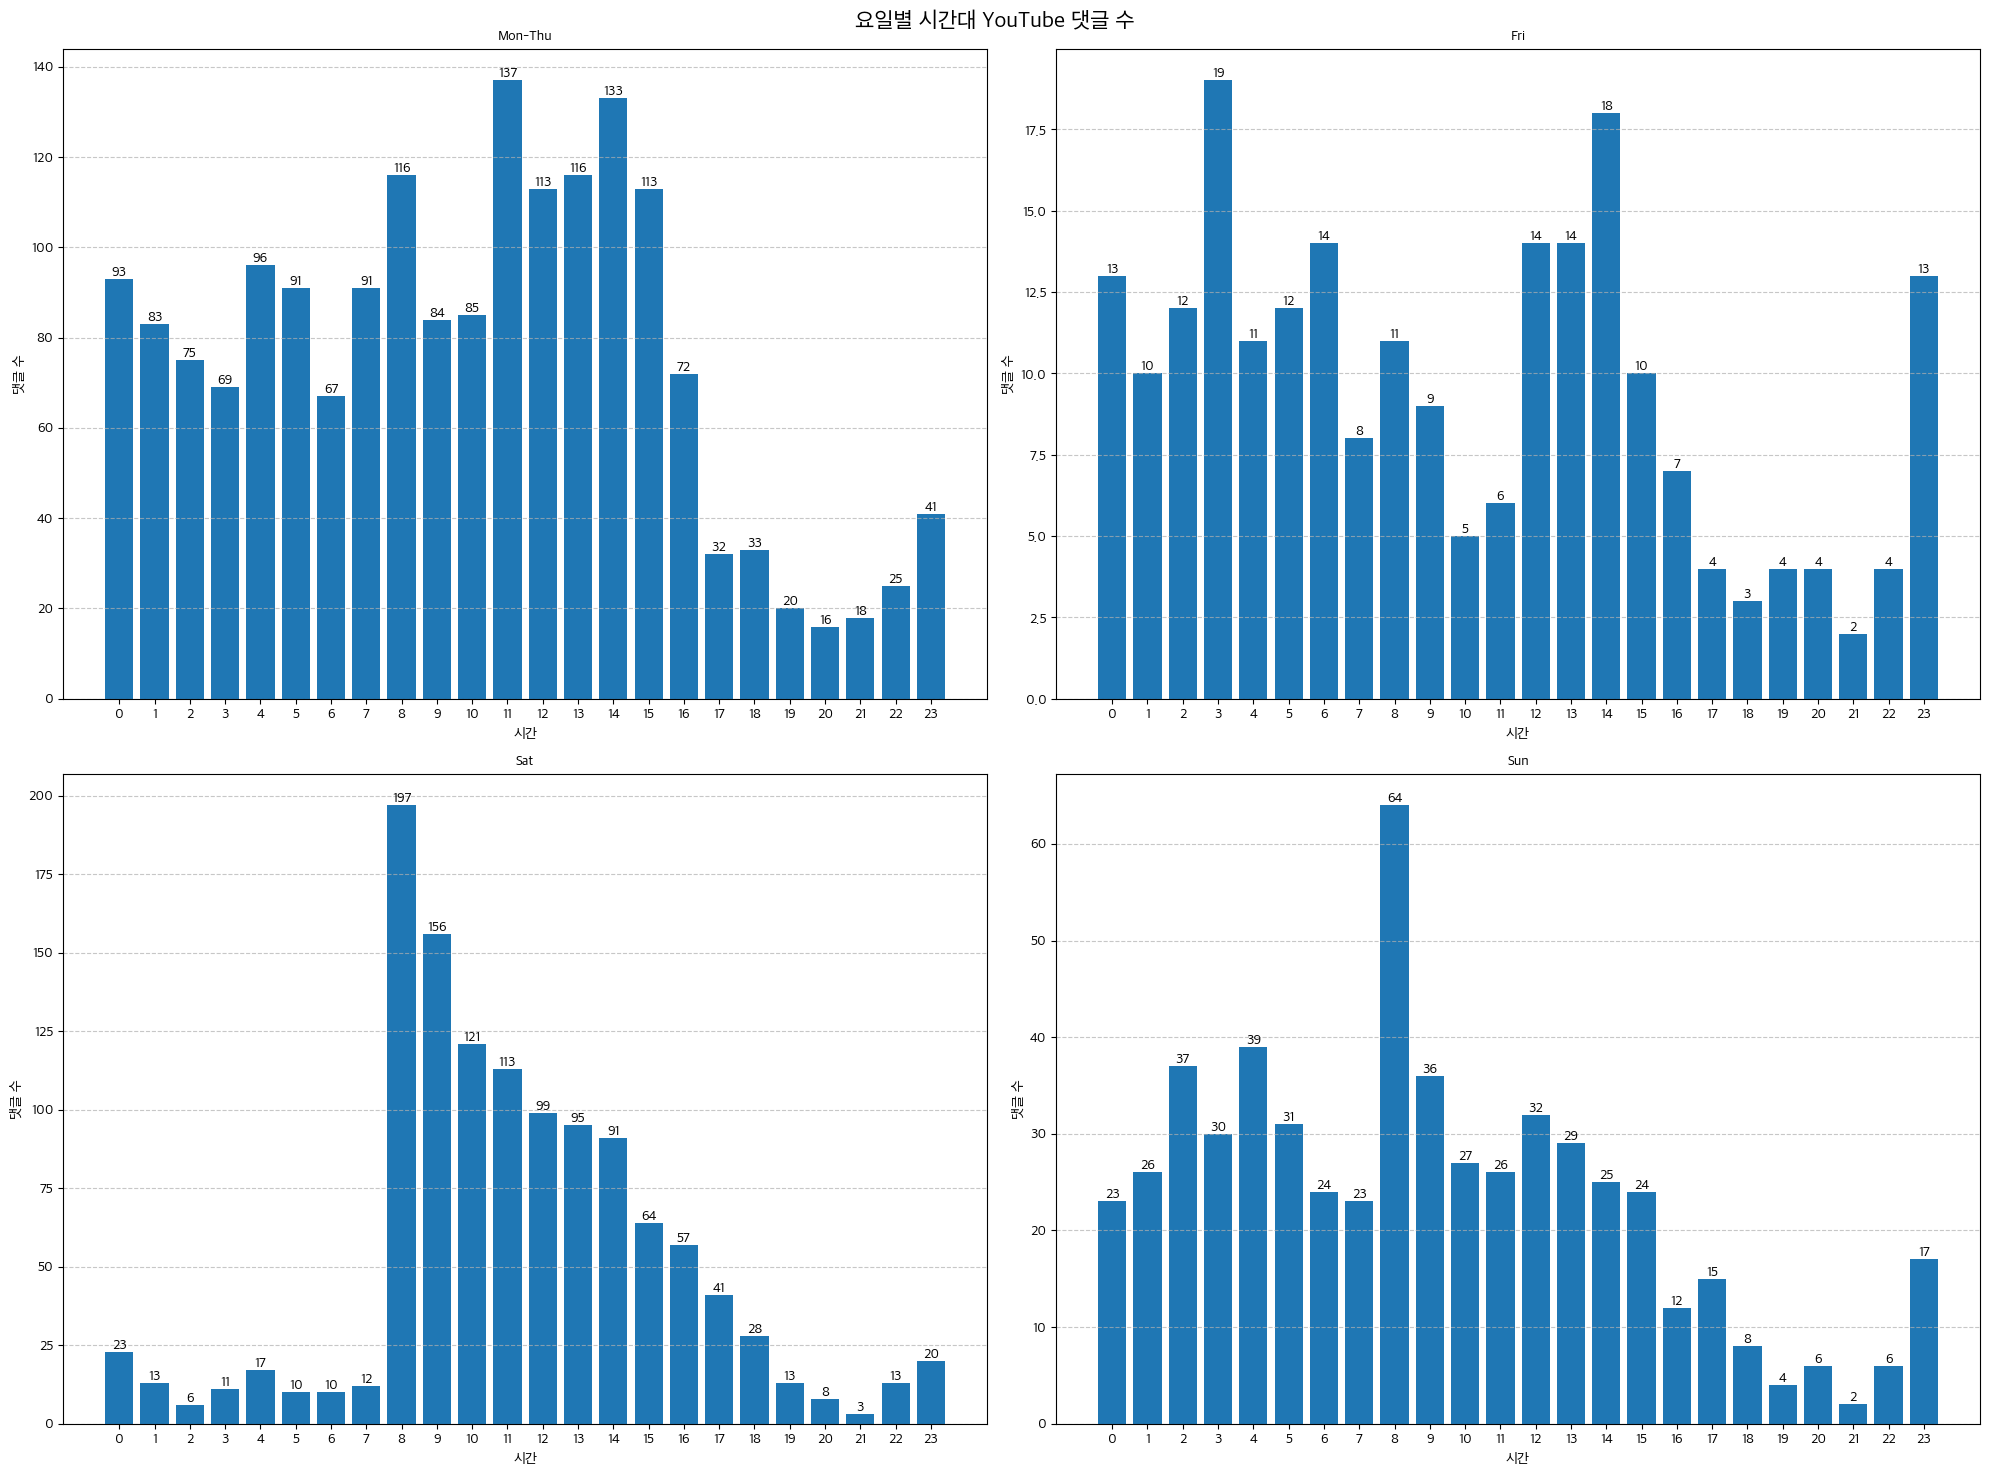

분석 결과가 'youtube_comments_weekday_analysis.png' 파일로 저장되었습니다.


In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.font_manager as fm

# Mac에서 사용 가능한 한글 폰트 설정
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# CSV 파일들이 있는 디렉토리 경로
directories = ['디저스', '입시맘', '티처스 외전 및 티저']

# 요일별 시간대 댓글 수를 저장할 딕셔너리
weekday_hour_counts = {
    'Mon-Thu': [0] * 24,
    'Fri': [0] * 24,
    'Sat': [0] * 24,
    'Sun': [0] * 24
}

# 모든 CSV 파일에서 데이터 읽기
for directory in directories:
    if not os.path.exists(directory):
        print(f"경고: '{directory}' 디렉토리를 찾을 수 없습니다.")
        continue
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            try:
                df = pd.read_csv(file_path)
                if 'Published At' in df.columns:
                    for timestamp in df['Published At']:
                        try:
                            dt = datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%SZ')
                            weekday = dt.weekday()
                            hour = dt.hour
                            if weekday < 4:  # 월-목
                                weekday_hour_counts['Mon-Thu'][hour] += 1
                            elif weekday == 4:  # 금
                                weekday_hour_counts['Fri'][hour] += 1
                            elif weekday == 5:  # 토
                                weekday_hour_counts['Sat'][hour] += 1
                            else:  # 일
                                weekday_hour_counts['Sun'][hour] += 1
                        except ValueError:
                            print(f"경고: 잘못된 timestamp 형식 - {timestamp}")
                else:
                    print(f"경고: '{file_path}' 파일에 'Published At' 열이 없습니다.")
            except Exception as e:
                print(f"오류: '{file_path}' 파일을 읽는 중 문제가 발생했습니다: {str(e)}")

# 시각화
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('요일별 시간대 YouTube 댓글 수', fontproperties=font_prop, fontsize=16)

for idx, (day, counts) in enumerate(weekday_hour_counts.items()):
    row = idx // 2
    col = idx % 2
    axs[row, col].bar(range(24), counts)
    axs[row, col].set_title(day, fontproperties=font_prop)
    axs[row, col].set_xlabel('시간', fontproperties=font_prop)
    axs[row, col].set_ylabel('댓글 수', fontproperties=font_prop)
    axs[row, col].set_xticks(range(24))
    axs[row, col].grid(axis='y', linestyle='--', alpha=0.7)
    
    for i, count in enumerate(counts):
        axs[row, col].text(i, count, str(count), ha='center', va='bottom', fontproperties=font_prop)

plt.tight_layout()
plt.savefig('youtube_comments_weekday_analysis.png', dpi=300)
plt.show()

print("분석 결과가 'youtube_comments_weekday_analysis.png' 파일로 저장되었습니다.")

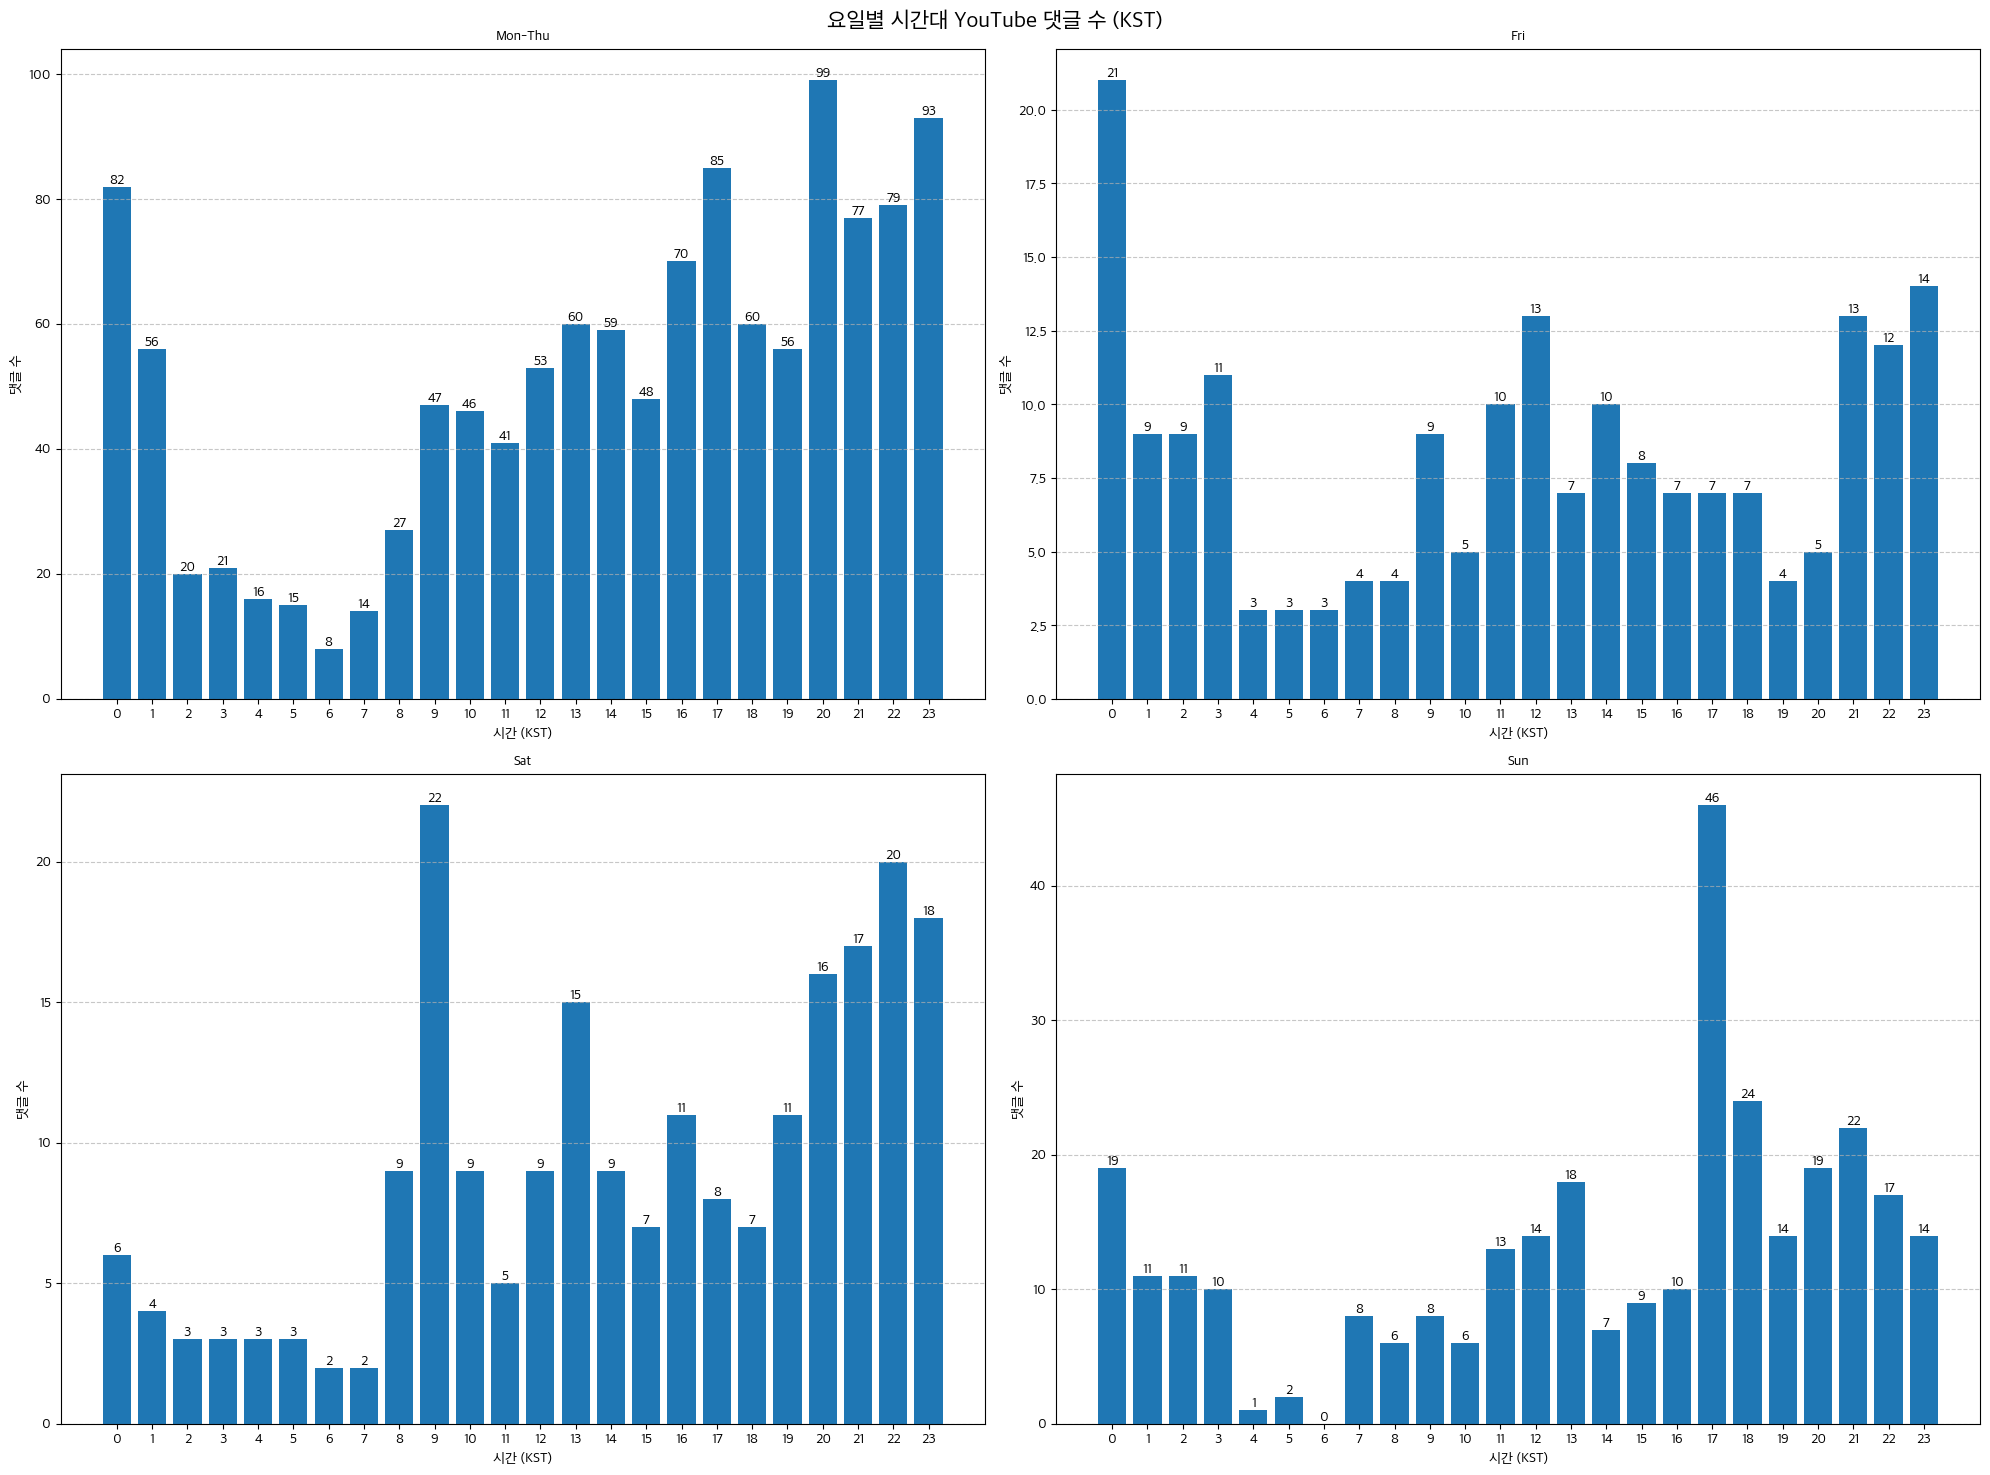

분석 결과가 'youtube_comments_weekday_analysis_kst.png' 파일로 저장되었습니다.


In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.font_manager as fm
from pytz import timezone

# Mac에서 사용 가능한 한글 폰트 설정
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# CSV 파일들이 있는 디렉토리 경로
directories = ['디저스', '입시맘', '티처스 외전 및 티저']

# 요일별 시간대 댓글 수를 저장할 딕셔너리
weekday_hour_counts = {
    'Mon-Thu': [0] * 24,
    'Fri': [0] * 24,
    'Sat': [0] * 24,
    'Sun': [0] * 24
}

# UTC를 KST로 변환하는 함수
def utc_to_kst(utc_time):
    utc = timezone('UTC')
    kst = timezone('Asia/Seoul')
    utc_dt = utc.localize(datetime.strptime(utc_time, '%Y-%m-%dT%H:%M:%SZ'))
    kst_dt = utc_dt.astimezone(kst)
    return kst_dt

# 모든 CSV 파일에서 데이터 읽기
for directory in directories:
    if not os.path.exists(directory):
        print(f"경고: '{directory}' 디렉토리를 찾을 수 없습니다.")
        continue
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            try:
                df = pd.read_csv(file_path)
                if 'Published At' in df.columns:
                    for timestamp in df['Published At']:
                        try:
                            kst_dt = utc_to_kst(timestamp)
                            weekday = kst_dt.weekday()
                            hour = kst_dt.hour
                            if weekday < 4:  # 월-목
                                weekday_hour_counts['Mon-Thu'][hour] += 1
                            elif weekday == 4:  # 금
                                weekday_hour_counts['Fri'][hour] += 1
                            elif weekday == 5:  # 토
                                weekday_hour_counts['Sat'][hour] += 1
                            else:  # 일
                                weekday_hour_counts['Sun'][hour] += 1
                        except ValueError:
                            print(f"경고: 잘못된 timestamp 형식 - {timestamp}")
                else:
                    print(f"경고: '{file_path}' 파일에 'Published At' 열이 없습니다.")
            except Exception as e:
                print(f"오류: '{file_path}' 파일을 읽는 중 문제가 발생했습니다: {str(e)}")

# 시각화
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('요일별 시간대 YouTube 댓글 수 (KST)', fontproperties=font_prop, fontsize=16)

for idx, (day, counts) in enumerate(weekday_hour_counts.items()):
    row = idx // 2
    col = idx % 2
    axs[row, col].bar(range(24), counts)
    axs[row, col].set_title(day, fontproperties=font_prop)
    axs[row, col].set_xlabel('시간 (KST)', fontproperties=font_prop)
    axs[row, col].set_ylabel('댓글 수', fontproperties=font_prop)
    axs[row, col].set_xticks(range(24))
    axs[row, col].grid(axis='y', linestyle='--', alpha=0.7)
    
    for i, count in enumerate(counts):
        axs[row, col].text(i, count, str(count), ha='center', va='bottom', fontproperties=font_prop)

plt.tight_layout()
plt.savefig('youtube_comments_weekday_analysis_kst.png', dpi=300)
plt.show()

print("분석 결과가 'youtube_comments_weekday_analysis_kst.png' 파일로 저장되었습니다.")

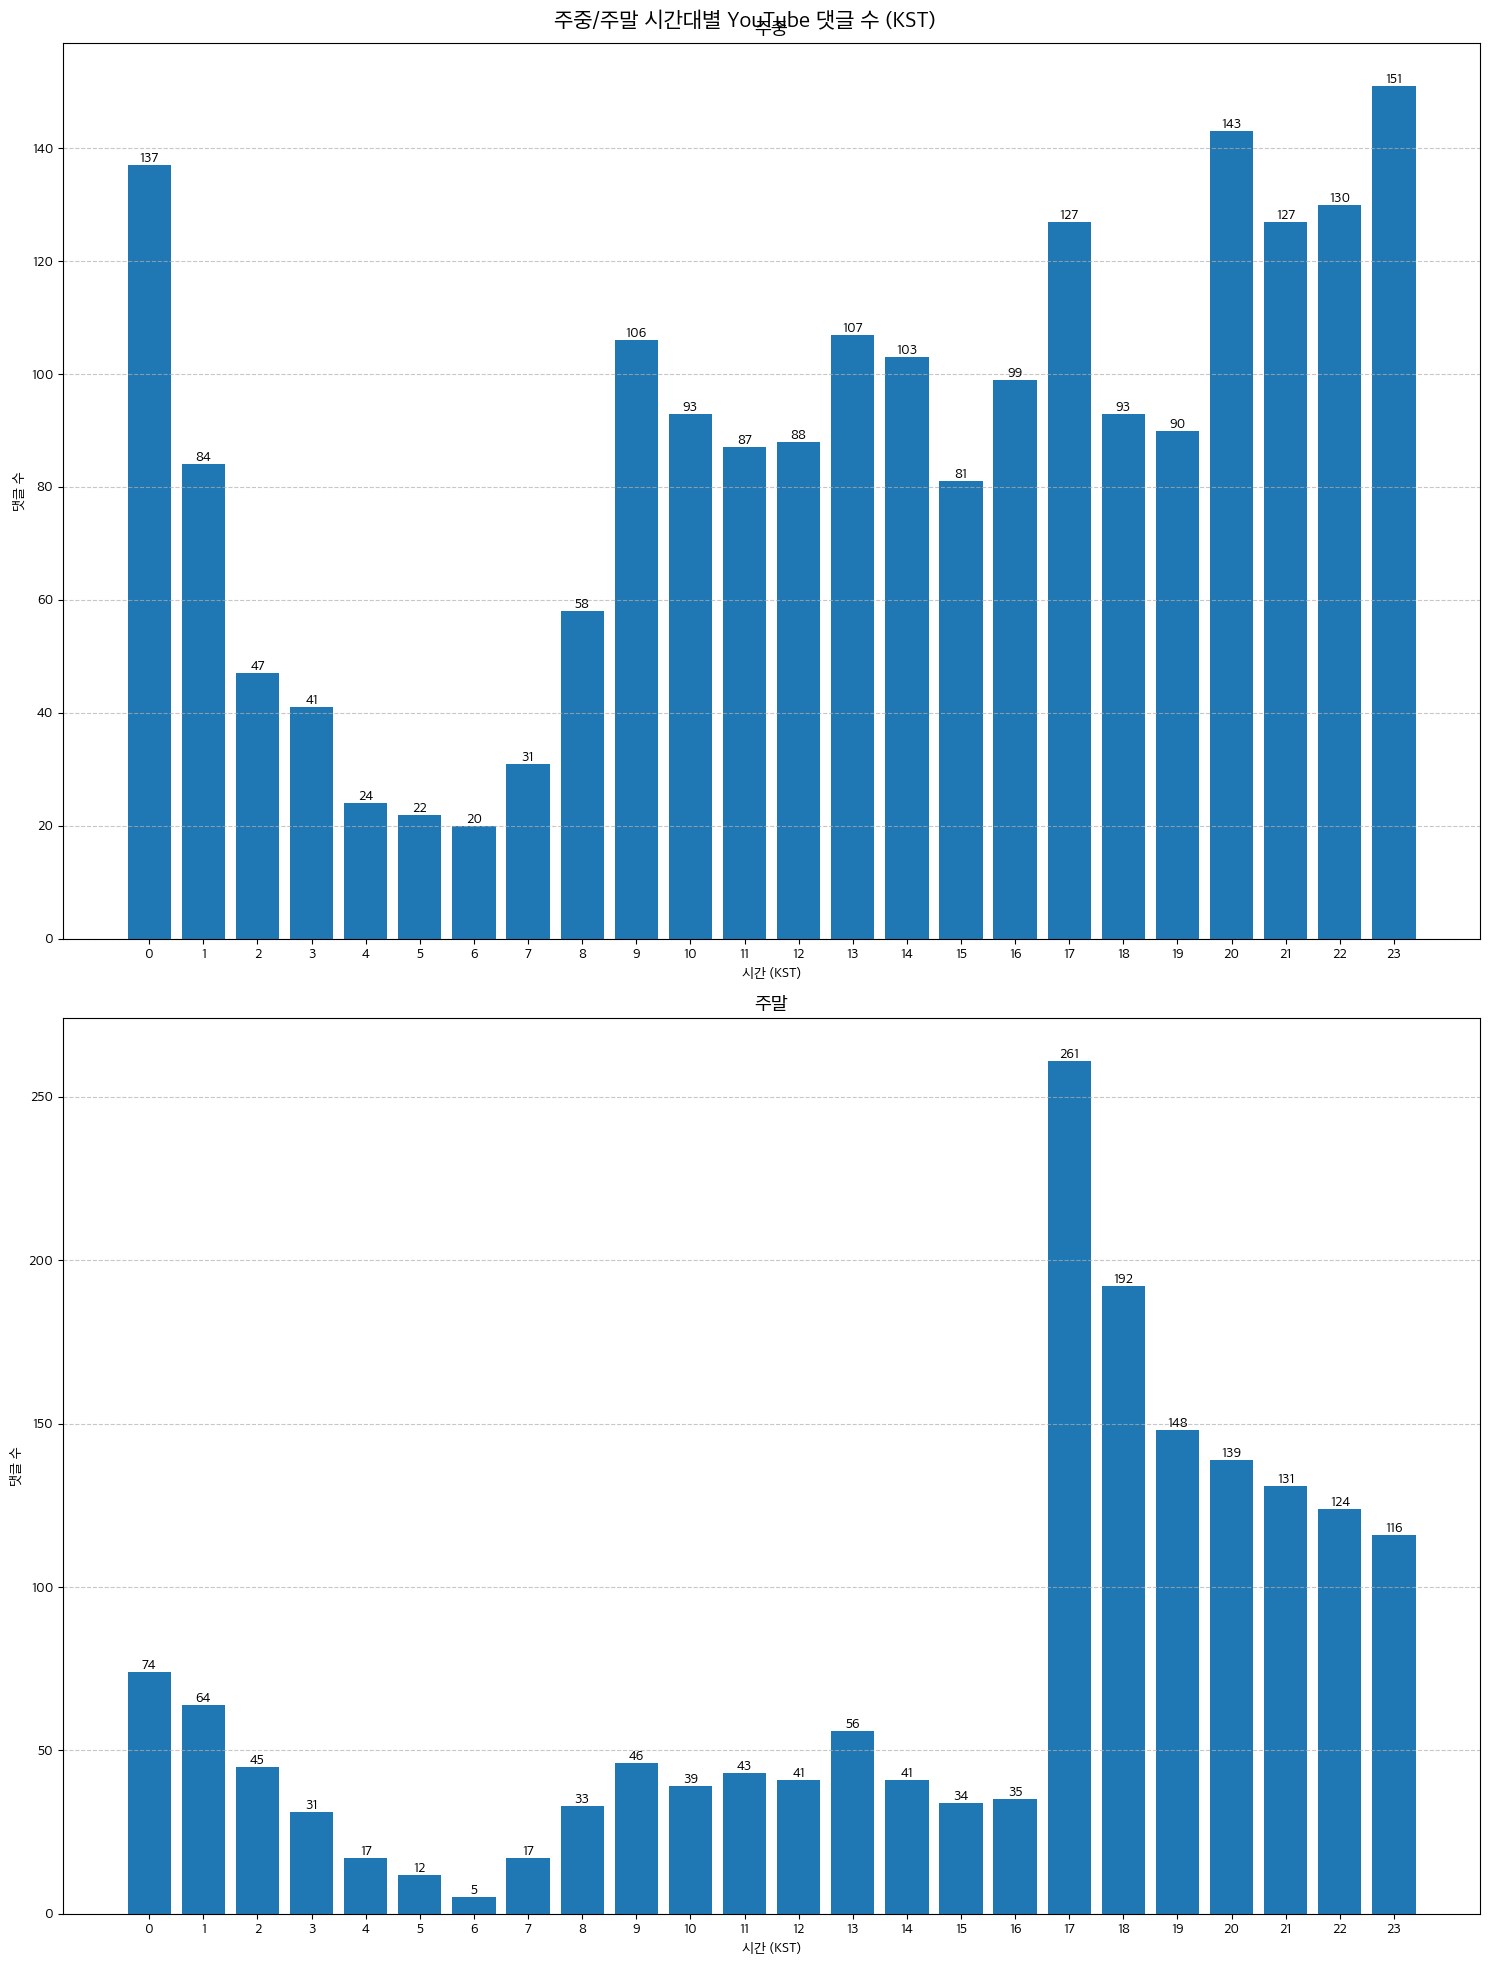

분석 결과가 'youtube_comments_weekday_weekend_analysis_kst.png' 파일로 저장되었습니다.


In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.font_manager as fm
from pytz import timezone

# Mac에서 사용 가능한 한글 폰트 설정
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# CSV 파일들이 있는 디렉토리 경로
directories = ['디저스', '입시맘', '티처스 외전 및 티저']

# 주중/주말 시간대 댓글 수를 저장할 딕셔너리
day_hour_counts = {
    'Weekday': [0] * 24,
    'Weekend': [0] * 24
}

# UTC를 KST로 변환하는 함수
def utc_to_kst(utc_time):
    utc = timezone('UTC')
    kst = timezone('Asia/Seoul')
    utc_dt = utc.localize(datetime.strptime(utc_time, '%Y-%m-%dT%H:%M:%SZ'))
    kst_dt = utc_dt.astimezone(kst)
    return kst_dt

# 모든 CSV 파일에서 데이터 읽기
for directory in directories:
    if not os.path.exists(directory):
        print(f"경고: '{directory}' 디렉토리를 찾을 수 없습니다.")
        continue
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            try:
                df = pd.read_csv(file_path)
                if 'Published At' in df.columns:
                    for timestamp in df['Published At']:
                        try:
                            kst_dt = utc_to_kst(timestamp)
                            weekday = kst_dt.weekday()
                            hour = kst_dt.hour
                            if weekday < 5:  # 월-금
                                day_hour_counts['Weekday'][hour] += 1
                            else:  # 토-일
                                day_hour_counts['Weekend'][hour] += 1
                        except ValueError:
                            print(f"경고: 잘못된 timestamp 형식 - {timestamp}")
                else:
                    print(f"경고: '{file_path}' 파일에 'Published At' 열이 없습니다.")
            except Exception as e:
                print(f"오류: '{file_path}' 파일을 읽는 중 문제가 발생했습니다: {str(e)}")

# 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))
fig.suptitle('주중/주말 시간대별 YouTube 댓글 수 (KST)', fontproperties=font_prop, fontsize=16)

for idx, (day_type, counts) in enumerate(day_hour_counts.items()):
    ax = ax1 if idx == 0 else ax2
    bars = ax.bar(range(24), counts)
    ax.set_title(f"{'주중' if day_type == 'Weekday' else '주말'}", fontproperties=font_prop, fontsize=14)
    ax.set_xlabel('시간 (KST)', fontproperties=font_prop)
    ax.set_ylabel('댓글 수', fontproperties=font_prop)
    ax.set_xticks(range(24))
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # 각 막대 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontproperties=font_prop)

plt.tight_layout()
plt.savefig('youtube_comments_weekday_weekend_analysis_kst.png', dpi=300)
plt.show()

print("분석 결과가 'youtube_comments_weekday_weekend_analysis_kst.png' 파일로 저장되었습니다.")

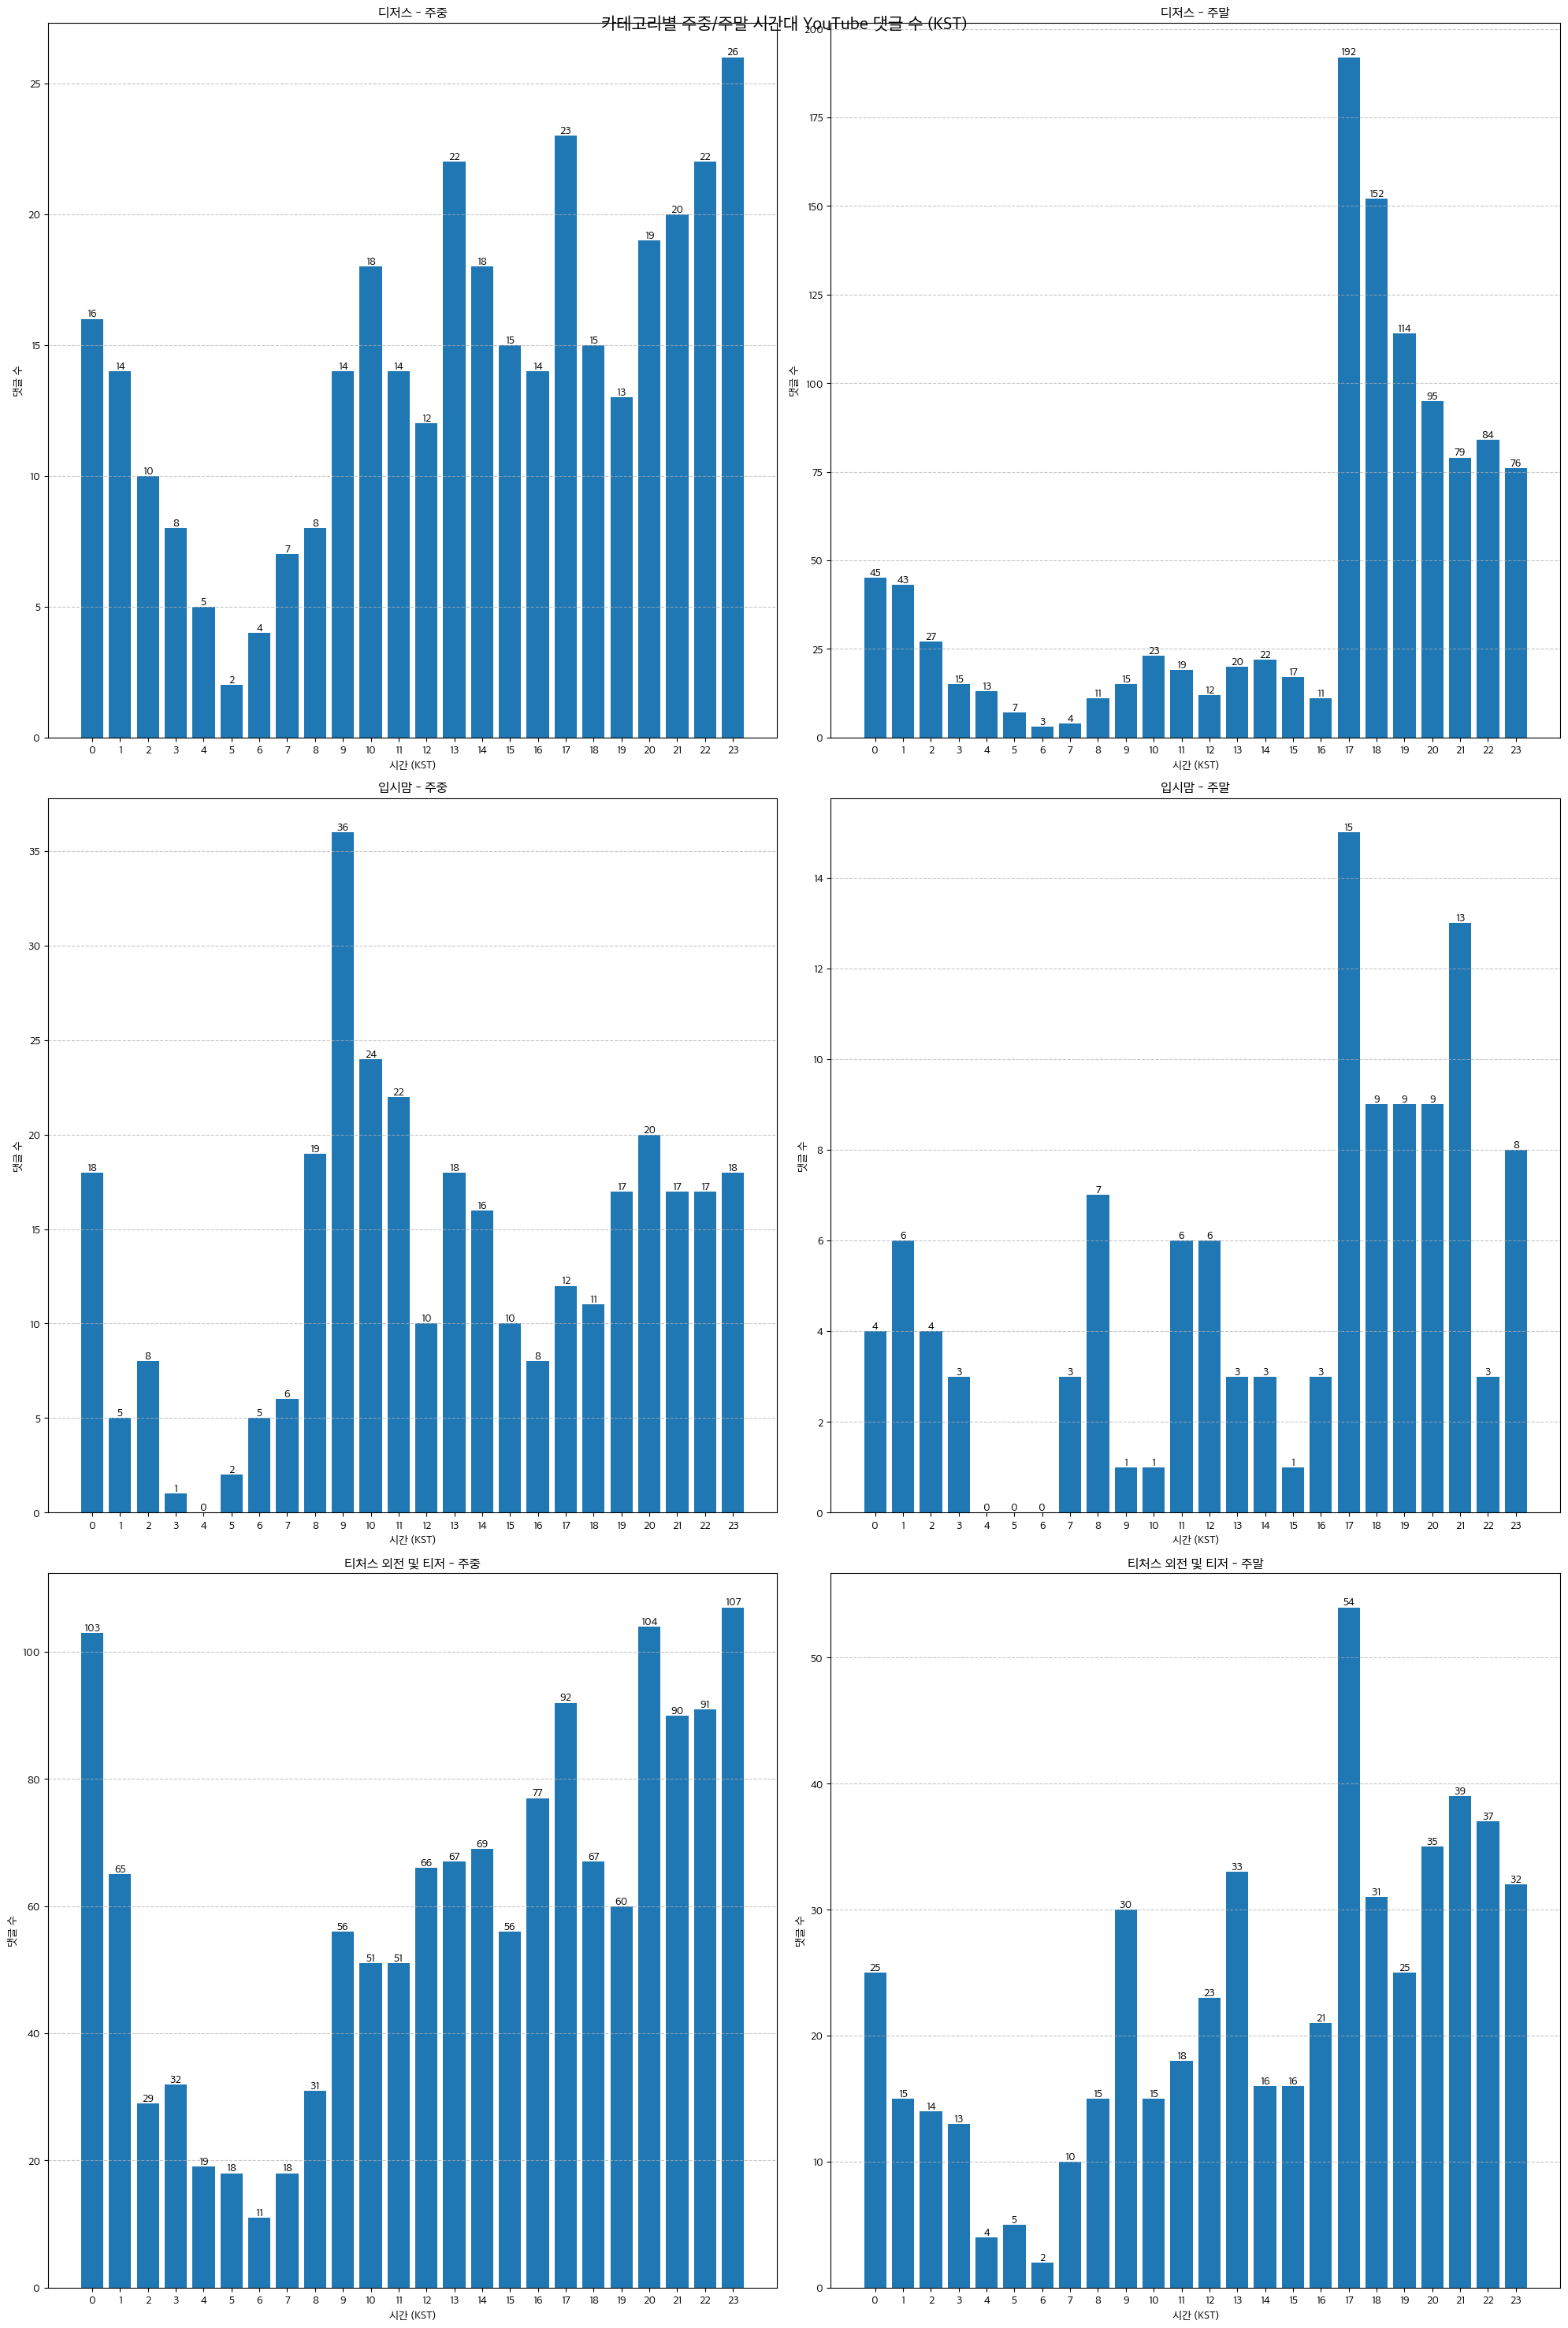

분석 결과가 'youtube_comments_category_analysis_kst.png' 파일로 저장되었습니다.


In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.font_manager as fm
from pytz import timezone

# Mac에서 사용 가능한 한글 폰트 설정
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# CSV 파일들이 있는 디렉토리 경로
directories = ['디저스', '입시맘', '티처스 외전 및 티저']

# 각 카테고리별 주중/주말 시간대 댓글 수를 저장할 딕셔너리
category_day_hour_counts = {
    category: {
        'Weekday': [0] * 24,
        'Weekend': [0] * 24
    } for category in directories
}

# UTC를 KST로 변환하는 함수
def utc_to_kst(utc_time):
    utc = timezone('UTC')
    kst = timezone('Asia/Seoul')
    utc_dt = utc.localize(datetime.strptime(utc_time, '%Y-%m-%dT%H:%M:%SZ'))
    kst_dt = utc_dt.astimezone(kst)
    return kst_dt

# 모든 CSV 파일에서 데이터 읽기
for directory in directories:
    if not os.path.exists(directory):
        print(f"경고: '{directory}' 디렉토리를 찾을 수 없습니다.")
        continue
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            try:
                df = pd.read_csv(file_path)
                if 'Published At' in df.columns:
                    for timestamp in df['Published At']:
                        try:
                            kst_dt = utc_to_kst(timestamp)
                            weekday = kst_dt.weekday()
                            hour = kst_dt.hour
                            if weekday < 5:  # 월-금
                                category_day_hour_counts[directory]['Weekday'][hour] += 1
                            else:  # 토-일
                                category_day_hour_counts[directory]['Weekend'][hour] += 1
                        except ValueError:
                            print(f"경고: 잘못된 timestamp 형식 - {timestamp}")
                else:
                    print(f"경고: '{file_path}' 파일에 'Published At' 열이 없습니다.")
            except Exception as e:
                print(f"오류: '{file_path}' 파일을 읽는 중 문제가 발생했습니다: {str(e)}")

# 시각화
fig, axs = plt.subplots(3, 2, figsize=(20, 30))
fig.suptitle('카테고리별 주중/주말 시간대 YouTube 댓글 수 (KST)', fontproperties=font_prop, fontsize=16)

for idx, (category, day_counts) in enumerate(category_day_hour_counts.items()):
    for day_idx, (day_type, counts) in enumerate(day_counts.items()):
        ax = axs[idx, day_idx]
        bars = ax.bar(range(24), counts)
        ax.set_title(f"{category} - {'주중' if day_type == 'Weekday' else '주말'}", fontproperties=font_prop, fontsize=12)
        ax.set_xlabel('시간 (KST)', fontproperties=font_prop)
        ax.set_ylabel('댓글 수', fontproperties=font_prop)
        ax.set_xticks(range(24))
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        
        # 각 막대 위에 값 표시
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontproperties=font_prop)

plt.tight_layout()
plt.savefig('youtube_comments_category_analysis_kst.png', dpi=300)
plt.show()

print("분석 결과가 'youtube_comments_category_analysis_kst.png' 파일로 저장되었습니다.")

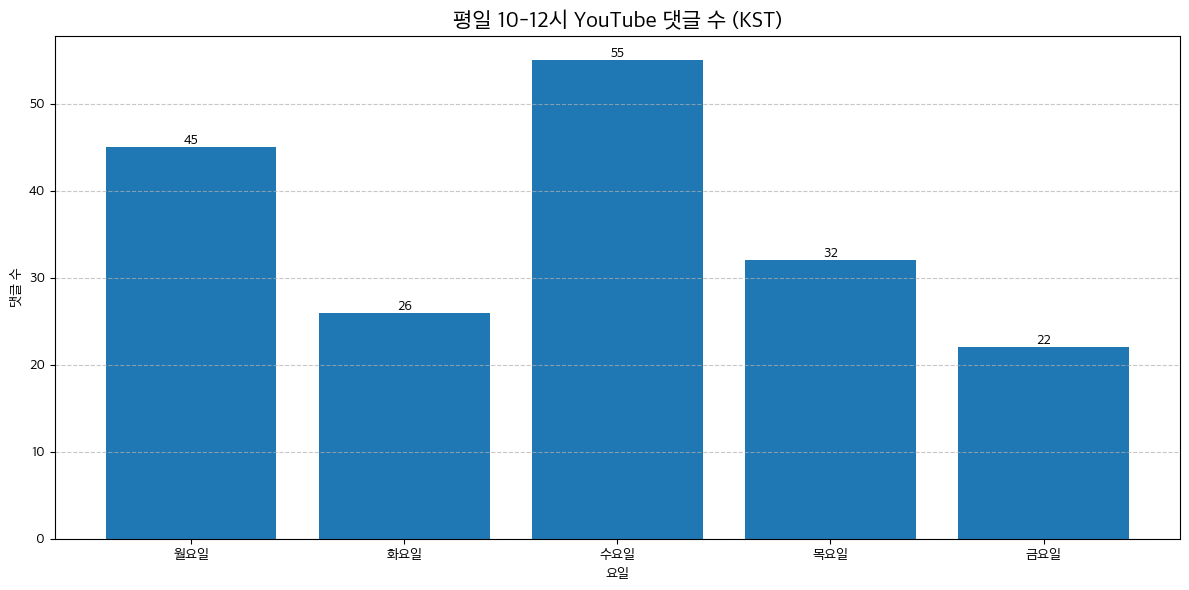

분석 결과가 'youtube_comments_weekday_10-12_analysis_kst.png' 파일로 저장되었습니다.
월요일: 45개
화요일: 26개
수요일: 55개
목요일: 32개
금요일: 22개


In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.font_manager as fm
from pytz import timezone

# Mac에서 사용 가능한 한글 폰트 설정
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# CSV 파일들이 있는 디렉토리 경로
directories = ['디저스', '입시맘', '티처스 외전 및 티저']
# directories = ['입시맘']

# 요일별 댓글 수를 저장할 딕셔너리
weekday_counts = {
    '월요일': 0,
    '화요일': 0,
    '수요일': 0,
    '목요일': 0,
    '금요일': 0
}

# UTC를 KST로 변환하는 함수
def utc_to_kst(utc_time):
    utc = timezone('UTC')
    kst = timezone('Asia/Seoul')
    utc_dt = utc.localize(datetime.strptime(utc_time, '%Y-%m-%dT%H:%M:%SZ'))
    kst_dt = utc_dt.astimezone(kst)
    return kst_dt

# 모든 CSV 파일에서 데이터 읽기
for directory in directories:
    if not os.path.exists(directory):
        print(f"경고: '{directory}' 디렉토리를 찾을 수 없습니다.")
        continue
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            try:
                df = pd.read_csv(file_path)
                if 'Published At' in df.columns:
                    for timestamp in df['Published At']:
                        try:
                            kst_dt = utc_to_kst(timestamp)
                            weekday = kst_dt.weekday()
                            hour = kst_dt.hour
                            if weekday < 5 and 10 <= hour < 12:  # 월-금, 10시-12시
                                weekday_counts[list(weekday_counts.keys())[weekday]] += 1
                        except ValueError:
                            print(f"경고: 잘못된 timestamp 형식 - {timestamp}")
                else:
                    print(f"경고: '{file_path}' 파일에 'Published At' 열이 없습니다.")
            except Exception as e:
                print(f"오류: '{file_path}' 파일을 읽는 중 문제가 발생했습니다: {str(e)}")

# 시각화
plt.figure(figsize=(12, 6))
bars = plt.bar(weekday_counts.keys(), weekday_counts.values())
plt.title('평일 10-12시 YouTube 댓글 수 (KST)', fontproperties=font_prop, fontsize=16)
plt.xlabel('요일', fontproperties=font_prop)
plt.ylabel('댓글 수', fontproperties=font_prop)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontproperties=font_prop)

plt.tight_layout()
plt.savefig('youtube_comments_weekday_10-12_analysis_kst.png', dpi=300)
plt.show()

print("분석 결과가 'youtube_comments_weekday_10-12_analysis_kst.png' 파일로 저장되었습니다.")

# 요일별 댓글 수 출력
for day, count in weekday_counts.items():
    print(f"{day}: {count}개")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from datetime import datetime, timedelta
from pytz import timezone

# 1. 데이터 전처리
def preprocess_data(csv_files):
    all_comments = []
    for file in csv_files:
        df = pd.read_csv(file)
        for timestamp in df['Published At']:
            kst_time = utc_to_kst(timestamp)
            all_comments.append(kst_time)
    return all_comments

def utc_to_kst(utc_time):
    utc = timezone('UTC')
    kst = timezone('Asia/Seoul')
    utc_dt = utc.localize(datetime.strptime(utc_time, '%Y-%m-%dT%H:%M:%SZ'))
    return utc_dt.astimezone(kst)

# 2. 타임테이블 구조화
def create_timetable_structure():
    timetable = []
    # 여기에 이미지의 타임테이블 구조를 코드로 표현
    # 예: timetable.append({"start": "10:00", "end": "10:30", "program": "뉴스A LIVE"})
    return timetable

# 3. 데이터 매칭
def match_comments_to_blocks(comments, timetable):
    block_counts = {block['program']: 0 for block in timetable}
    for comment_time in comments:
        for block in timetable:
            if block['start'] <= comment_time.strftime('%H:%M') < block['end']:
                block_counts[block['program']] += 1
                break
    return block_counts

# 4. 시각화
def visualize_timetable(timetable, block_counts):
    fig, ax = plt.subplots(figsize=(20, 10))
    
    # 그리드 그리기
    for block in timetable:
        # 각 블록을 사각형으로 표시
        rect = patches.Rectangle((x, y), width, height, fill=False)
        ax.add_patch(rect)
        
        # 댓글 수에 비례하는 원 그리기
        count = block_counts[block['program']]
        circle = patches.Circle((x_center, y_center), radius, color='red', alpha=0.5)
        ax.add_patch(circle)
    
    plt.title("프로그램별 댓글 분포")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('timetable_comment_distribution.png', dpi=300)
    plt.show()

# 메인 실행 코드
csv_files = ['file1.csv', 'file2.csv', 'file3.csv']  # CSV 파일 목록
comments = preprocess_data(csv_files)
timetable = create_timetable_structure()
block_counts = match_comments_to_blocks(comments, timetable)
visualize_timetable(timetable, block_counts)

# 5. 분석
max_comments_program = max(block_counts, key=block_counts.get)
print(f"가장 많은 댓글이 작성된 프로그램: {max_comments_program}")
print(f"댓글 수: {block_counts[max_comments_program]}")

In [18]:
from datetime import datetime, timedelta

schedule = '월요일 00:40 [교양] 100세 프로젝트 01:40 [교양] 오은영의 금쪽 상담소 스페셜 02:50 [교양] 채널A 스페셜 구해줘 전원주택 시즌31 03:50 [보도] 채널A 화재 특보 04:00 [교양] 채널A 스페셜 영국 왕립식물원, 큐가든의 사계 시즌2 04:50 [교양] 채널A 스페셜 DNA로 찾는 가족의 비밀 시즌3 06:00 [교양] 특별기획 더하기 빼기 프로젝트 칼슘의 이동 07:00 [예능] 미스테리야 시즌2 07:30 [교양] 행복한 아침 08:50 [예능] 요즘 남자 라이프 신랑수업 10:30 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 12:00 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 13:20 [교양] 꽃길만 걸어요 시즌2 14:20 [교양] 절친 토큐멘터리 4인용식탁 15:40 [예능] 아빠는 꽃중년 17:40 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 20:00 [교양] 절친 토큐멘터리 4인용식탁 21:20 [예능] 탐정들의 영업비밀 23:10 [교양] 폴킴의 커피 한 잔 할래요 화요일 00:30 [교양] 100세 프로젝트 01:30 [교양] 오은영의 금쪽 상담소 02:50 [교양] 채널A 스페셜 과거의 현장을 가다 시즌8 03:50 [보도] 채널A 화재 특보 04:00 [교양] 채널A 스페셜 세상의 모든 미스터리 시즌3 05:00 [교양] 채널A 스페셜 구해줘 전원주택 시즌31 06:00 [교양] 채널A 건강 스페셜 07:00 [예능] 미스테리야 시즌2 07:30 [교양] 행복한 아침 08:50 [교양] 김진의 돌직구 쇼 10:30 [예능] 남의 나라 살아요 선 넘은 패밀리 12:00 [보도] 뉴스A LIVE 13:20 [교양] 28청춘 14:20 [예능] 요즘 육아 금쪽같은 내새끼 15:50 [교양] 오은영의 금쪽 상담소 17:10 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 20:10 [교양] 100세 프로젝트 21:10 [예능] 성적을 부탁해 티처스 22:40 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 수요일 00:10 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 01:40 [교양] 채널A 스페셜 현대문명의 대전환 3 02:40 [교양] 채널A 스페셜 과거의 현장을 가다 시즌8 03:40 [보도] 채널A 지진 특보 03:50 [보도] 채널A 화재 특보 04:00 [교양] 채널A 스페셜 세상의 모든 미스터리 시즌3 05:00 [교양] 채널A 스페셜 구해줘 전원주택 시즌31 06:00 [교양] 순정시대 07:00 [예능] 미스테리야 시즌2 07:30 [교양] 행복한 아침 08:50 [교양] 김진의 돌직구 쇼 10:30 [예능] 요즘 남자 라이프 신랑수업 12:00 [보도] 뉴스A LIVE 13:20 [교양] 순정시대 14:20 [예능] 아빠는 꽃중년 15:50 [교양] 절친 토큐멘터리 4인용식탁 17:10 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 20:10 [예능] 탐정들의 영업비밀 스페셜 21:30 [예능] 요즘 남자 라이프 신랑수업 23:10 [예능] 남의 나라 살아요 선 넘은 패밀리 스페셜 목요일 00:30 [교양] 순정시대 01:30 [교양] 채널A 스페셜 과거의 현장을 가다 시즌8 02:30 [교양] 채널A 스페셜 드림 하우스 프로젝트 03:30 [교양] 채널A 스페셜 우주탐사 시즌5 04:00 [교양] 채널A 스페셜 세상의 모든 미스터리 시즌3 05:00 [교양] 채널A 스페셜 구해줘 전원주택 시즌31 06:00 [교양] 건강 스페셜 한양촌 07:00 [예능] 미스테리야 시즌2 07:30 [교양] 행복한 아침 08:50 [교양] 김진의 돌직구 쇼 10:30 [예능] 이제 만나러 갑니다 스페셜 12:00 [보도] 뉴스A LIVE 13:20 [교양] 100세 프로젝트 14:20 [교양] 도깨비 속담 캡처 14:50 [예능] 요즘 남자 라이프 신랑수업 스페셜 15:50 [예능] 탐정들의 영업비밀 스페셜 17:10 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 20:10 [교양] 오은영의 금쪽 상담소 21:30 [예능] 아빠는 꽃중년 23:40 [예능] 요즘 육아 금쪽같은 내새끼 금요일 00:30 [교양] 순정시대 01:30 [교양] 채널A 스페셜 현대문명의 대전환 3 02:50 [교양] 채널A 스페셜 자연사박물관 시즌1 03:40 [보도] 채널A 지진 특보 03:50 [보도] 채널A 화재 특보 04:00 [교양] 채널A 스페셜 람세스 2세의 잃어버린 도시 05:00 [교양] 채널A 스페셜 폼페이: 최후의 미스터리 06:00 [교양] 채널A 시청자마당 07:00 [예능] 거멍숲을 지켜라! 버디프렌즈 07:30 [교양] 행복한 아침 08:50 [교양] 김진의 돌직구 쇼 10:30 [교양] 절친 토큐멘터리 4인용식탁 11:50 [보도] 뉴스A LIVE 1부 13:10 [보도] 뉴스A LIVE 2부 13:20 [교양] 고두심이 좋아서 베스트 14:00 [예능] 채널A 스포츠 제17회 안성세계소프트테니스선수권대회 (혼합복식 결승) 15:50 [예능] 남의 나라 살아요 선 넘은 패밀리 스페셜 17:10 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 20:10 [예능] 요즘 육아 금쪽같은 내새끼 21:40 [예능] 남의 나라 살아요 선 넘은 패밀리 23:30 [예능] 아빠는 꽃중년 토요일 01:00 [예능] 성적을 부탁해 티처스 02:30 [교양] 채널A 스페셜 자연사박물관 시즌1 03:20 [교양] 채널A 스페셜 주말여행 산이 좋다 시즌2 04:00 [보도] 채널A 화재 특보 04:10 [교양] 채널A 스페셜 영국 왕립식물원, 큐가든의 사계 시즌1 05:00 [교양] 절친 토큐멘터리 4인용식탁 06:00 [교양] 순정시대 07:00 [교양] 28청춘 08:00 [교양] 아이Quiz 08:30 [예능] 거멍숲을 지켜라! 버디프렌즈 09:00 [교양] 꽃길만 걸어요 시즌2 10:00 [교양] 건강 스페셜 한양촌 11:00 [예능] 요즘 남자 라이프 신랑수업 스페셜 12:00 [교양] 토요 랭킹쇼 13:20 [예능] 성적을 부탁해 티처스 14:50 [예능] 아빠는 꽃중년 16:20 [교양] 절친 토큐멘터리 4인용식탁 17:40 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 19:50 [예능] 탐정들의 영업비밀 21:20 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 22:40 [예능] 요즘 육아 금쪽같은 내새끼 스페셜 일요일 00:00 [예능] 남의 나라 살아요 선 넘은 패밀리 01:30 [예능] 요즘 남자 라이프 신랑수업 03:00 [교양] 채널A 스페셜 영국 왕립식물원, 큐가든의 사계 시즌1 03:50 [보도] 채널A 화재 특보 04:00 [교양] 채널A 스페셜 웰컴투 별별실험실 04:40 [교양] 채널A 스페셜 영국 왕립식물원, 큐가든의 사계 시즌1 05:30 [교양] 채널A 스페셜 영국 왕립식물원, 큐가든의 사계 시즌1 06:20 [교양] 28청춘 07:20 [교양] 28청춘 08:20 [교양] 100세 프로젝트 09:20 [교양] 순정시대 10:20 [예능] 이제 만나러 갑니다 12:00 [보도] 뉴스A LIVE 13:20 [예능] 요즘 남자 라이프 신랑수업 14:50 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 16:10 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 17:40 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 19:50 [예능] 성적을 부탁해 티처스 21:20 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 22:40 [예능] 이제 만나러 갑니다 24:00 [종료]'

def parse_time(time_str):
    return datetime.strptime(time_str, "%H:%M").time()

def create_timetable_structure(schedule):
    timetable = []
    lines = schedule.strip().split('\n')
    current_day = None
    
    for i in range(0, len(lines), 2):
        if lines[i] in ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']:
            current_day = lines[i]
            continue
        
        start_time = lines[i]
        program = lines[i+1]
        
        # 다음 프로그램의 시작 시간을 현재 프로그램의 종료 시간으로 사용
        end_time = lines[i+2] if i+2 < len(lines) and ':' in lines[i+2] else "24:00"
        
        timetable.append({
            "day": current_day,
            "start": start_time,
            "end": end_time,
            "program": program
        })
    
    return timetable

# 타임테이블 생성
timetable = create_timetable_structure(schedule)

# 결과 출력 (처음 10개 항목만)
print("채널A 타임테이블 구조:")
for entry in timetable[:10]:
    print(f"{entry['day']} {entry['start']}-{entry['end']}: {entry['program']}")

print(f"\n총 프로그램 수: {len(timetable)}")

IndexError: list index out of range

In [19]:
# 원본 데이터를 여러 줄로 정리
schedule_raw = '월요일 00:40 [교양] 100세 프로젝트 01:40 [교양] 오은영의 금쪽 상담소 스페셜 02:50 [교양] 채널A 스페셜 구해줘 전원주택 시즌31 03:50 [보도] 채널A 화재 특보 04:00 [교양] 채널A 스페셜 영국 왕립식물원, 큐가든의 사계 시즌2 04:50 [교양] 채널A 스페셜 DNA로 찾는 가족의 비밀 시즌3 06:00 [교양] 특별기획 더하기 빼기 프로젝트 칼슘의 이동 07:00 [예능] 미스테리야 시즌2 07:30 [교양] 행복한 아침 08:50 [예능] 요즘 남자 라이프 신랑수업 10:30 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 12:00 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 13:20 [교양] 꽃길만 걸어요 시즌2 14:20 [교양] 절친 토큐멘터리 4인용식탁 15:40 [예능] 아빠는 꽃중년 17:40 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 20:00 [교양] 절친 토큐멘터리 4인용식탁 21:20 [예능] 탐정들의 영업비밀 23:10 [교양] 폴킴의 커피 한 잔 할래요 화요일 00:30 [교양] 100세 프로젝트 01:30 [교양] 오은영의 금쪽 상담소 02:50 [교양] 채널A 스페셜 과거의 현장을 가다 시즌8 03:50 [보도] 채널A 화재 특보 04:00 [교양] 채널A 스페셜 세상의 모든 미스터리 시즌3 05:00 [교양] 채널A 스페셜 구해줘 전원주택 시즌31 06:00 [교양] 채널A 건강 스페셜 07:00 [예능] 미스테리야 시즌2 07:30 [교양] 행복한 아침 08:50 [교양] 김진의 돌직구 쇼 10:30 [예능] 남의 나라 살아요 선 넘은 패밀리 12:00 [보도] 뉴스A LIVE 13:20 [교양] 28청춘 14:20 [예능] 요즘 육아 금쪽같은 내새끼 15:50 [교양] 오은영의 금쪽 상담소 17:10 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 20:10 [교양] 100세 프로젝트 21:10 [예능] 성적을 부탁해 티처스 22:40 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 수요일 00:10 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 01:40 [교양] 채널A 스페셜 현대문명의 대전환 3 02:40 [교양] 채널A 스페셜 과거의 현장을 가다 시즌8 03:40 [보도] 채널A 지진 특보 03:50 [보도] 채널A 화재 특보 04:00 [교양] 채널A 스페셜 세상의 모든 미스터리 시즌3 05:00 [교양] 채널A 스페셜 구해줘 전원주택 시즌31 06:00 [교양] 순정시대 07:00 [예능] 미스테리야 시즌2 07:30 [교양] 행복한 아침 08:50 [교양] 김진의 돌직구 쇼 10:30 [예능] 요즘 남자 라이프 신랑수업 12:00 [보도] 뉴스A LIVE 13:20 [교양] 순정시대 14:20 [예능] 아빠는 꽃중년 15:50 [교양] 절친 토큐멘터리 4인용식탁 17:10 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 20:10 [예능] 탐정들의 영업비밀 스페셜 21:30 [예능] 요즘 남자 라이프 신랑수업 23:10 [예능] 남의 나라 살아요 선 넘은 패밀리 스페셜 목요일 00:30 [교양] 순정시대 01:30 [교양] 채널A 스페셜 과거의 현장을 가다 시즌8 02:30 [교양] 채널A 스페셜 드림 하우스 프로젝트 03:30 [교양] 채널A 스페셜 우주탐사 시즌5 04:00 [교양] 채널A 스페셜 세상의 모든 미스터리 시즌3 05:00 [교양] 채널A 스페셜 구해줘 전원주택 시즌31 06:00 [교양] 건강 스페셜 한양촌 07:00 [예능] 미스테리야 시즌2 07:30 [교양] 행복한 아침 08:50 [교양] 김진의 돌직구 쇼 10:30 [예능] 이제 만나러 갑니다 스페셜 12:00 [보도] 뉴스A LIVE 13:20 [교양] 100세 프로젝트 14:20 [교양] 도깨비 속담 캡처 14:50 [예능] 요즘 남자 라이프 신랑수업 스페셜 15:50 [예능] 탐정들의 영업비밀 스페셜 17:10 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 20:10 [교양] 오은영의 금쪽 상담소 21:30 [예능] 아빠는 꽃중년 23:40 [예능] 요즘 육아 금쪽같은 내새끼 금요일 00:30 [교양] 순정시대 01:30 [교양] 채널A 스페셜 현대문명의 대전환 3 02:50 [교양] 채널A 스페셜 자연사박물관 시즌1 03:40 [보도] 채널A 지진 특보 03:50 [보도] 채널A 화재 특보 04:00 [교양] 채널A 스페셜 람세스 2세의 잃어버린 도시 05:00 [교양] 채널A 스페셜 폼페이: 최후의 미스터리 06:00 [교양] 채널A 시청자마당 07:00 [예능] 거멍숲을 지켜라! 버디프렌즈 07:30 [교양] 행복한 아침 08:50 [교양] 김진의 돌직구 쇼 10:30 [교양] 절친 토큐멘터리 4인용식탁 11:50 [보도] 뉴스A LIVE 1부 13:10 [보도] 뉴스A LIVE 2부 13:20 [교양] 고두심이 좋아서 베스트 14:00 [예능] 채널A 스포츠 제17회 안성세계소프트테니스선수권대회 (혼합복식 결승) 15:50 [예능] 남의 나라 살아요 선 넘은 패밀리 스페셜 17:10 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 20:10 [예능] 요즘 육아 금쪽같은 내새끼 21:40 [예능] 남의 나라 살아요 선 넘은 패밀리 23:30 [예능] 아빠는 꽃중년 토요일 01:00 [예능] 성적을 부탁해 티처스 02:30 [교양] 채널A 스페셜 자연사박물관 시즌1 03:20 [교양] 채널A 스페셜 주말여행 산이 좋다 시즌2 04:00 [보도] 채널A 화재 특보 04:10 [교양] 채널A 스페셜 영국 왕립식물원, 큐가든의 사계 시즌1 05:00 [교양] 절친 토큐멘터리 4인용식탁 06:00 [교양] 순정시대 07:00 [교양] 28청춘 08:00 [교양] 아이Quiz 08:30 [예능] 거멍숲을 지켜라! 버디프렌즈 09:00 [교양] 꽃길만 걸어요 시즌2 10:00 [교양] 건강 스페셜 한양촌 11:00 [예능] 요즘 남자 라이프 신랑수업 스페셜 12:00 [교양] 토요 랭킹쇼 13:20 [예능] 성적을 부탁해 티처스 14:50 [예능] 아빠는 꽃중년 16:20 [교양] 절친 토큐멘터리 4인용식탁 17:40 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 19:50 [예능] 탐정들의 영업비밀 21:20 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 22:40 [예능] 요즘 육아 금쪽같은 내새끼 스페셜 일요일 00:00 [예능] 남의 나라 살아요 선 넘은 패밀리 01:30 [예능] 요즘 남자 라이프 신랑수업 03:00 [교양] 채널A 스페셜 영국 왕립식물원, 큐가든의 사계 시즌1 03:50 [보도] 채널A 화재 특보 04:00 [교양] 채널A 스페셜 웰컴투 별별실험실 04:40 [교양] 채널A 스페셜 영국 왕립식물원, 큐가든의 사계 시즌1 05:30 [교양] 채널A 스페셜 영국 왕립식물원, 큐가든의 사계 시즌1 06:20 [교양] 28청춘 07:20 [교양] 28청춘 08:20 [교양] 100세 프로젝트 09:20 [교양] 순정시대 10:20 [예능] 이제 만나러 갑니다 12:00 [보도] 뉴스A LIVE 13:20 [예능] 요즘 남자 라이프 신랑수업 14:50 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 16:10 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 17:40 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 19:50 [예능] 성적을 부탁해 티처스 21:20 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 22:40 [예능] 이제 만나러 갑니다 24:00 [종료]'

# 문자열을 분리하여 리스트로 변환
data_list = schedule_raw.split()

# 변환된 데이터를 저장할 리스트
schedule = []

# 데이터 처리 (3개씩 묶어서 변환)
for i in range(1, len(data_list), 3):
    start_time = data_list[i]  # 시간
    program_name = f"{data_list[i+1]} {data_list[i+2]}"  # 프로그램명
    
    # 딕셔너리로 변환
    schedule.append({"start": start_time, "program": program_name})

# 결과 출력
for item in schedule:
    print(item)

{'start': '00:40', 'program': '[교양] 100세'}
{'start': '프로젝트', 'program': '01:40 [교양]'}
{'start': '오은영의', 'program': '금쪽 상담소'}
{'start': '스페셜', 'program': '02:50 [교양]'}
{'start': '채널A', 'program': '스페셜 구해줘'}
{'start': '전원주택', 'program': '시즌31 03:50'}
{'start': '[보도]', 'program': '채널A 화재'}
{'start': '특보', 'program': '04:00 [교양]'}
{'start': '채널A', 'program': '스페셜 영국'}
{'start': '왕립식물원,', 'program': '큐가든의 사계'}
{'start': '시즌2', 'program': '04:50 [교양]'}
{'start': '채널A', 'program': '스페셜 DNA로'}
{'start': '찾는', 'program': '가족의 비밀'}
{'start': '시즌3', 'program': '06:00 [교양]'}
{'start': '특별기획', 'program': '더하기 빼기'}
{'start': '프로젝트', 'program': '칼슘의 이동'}
{'start': '07:00', 'program': '[예능] 미스테리야'}
{'start': '시즌2', 'program': '07:30 [교양]'}
{'start': '행복한', 'program': '아침 08:50'}
{'start': '[예능]', 'program': '요즘 남자'}
{'start': '라이프', 'program': '신랑수업 10:30'}
{'start': '[드라마]', 'program': '채널A 토일드라마'}
{'start': '새벽', 'program': '2시의 신데렐라'}
{'start': '12:00', 'program': '[드라마] 채널A'}
{'start': '토일드라마', 'p

NameError: name 'x' is not defined

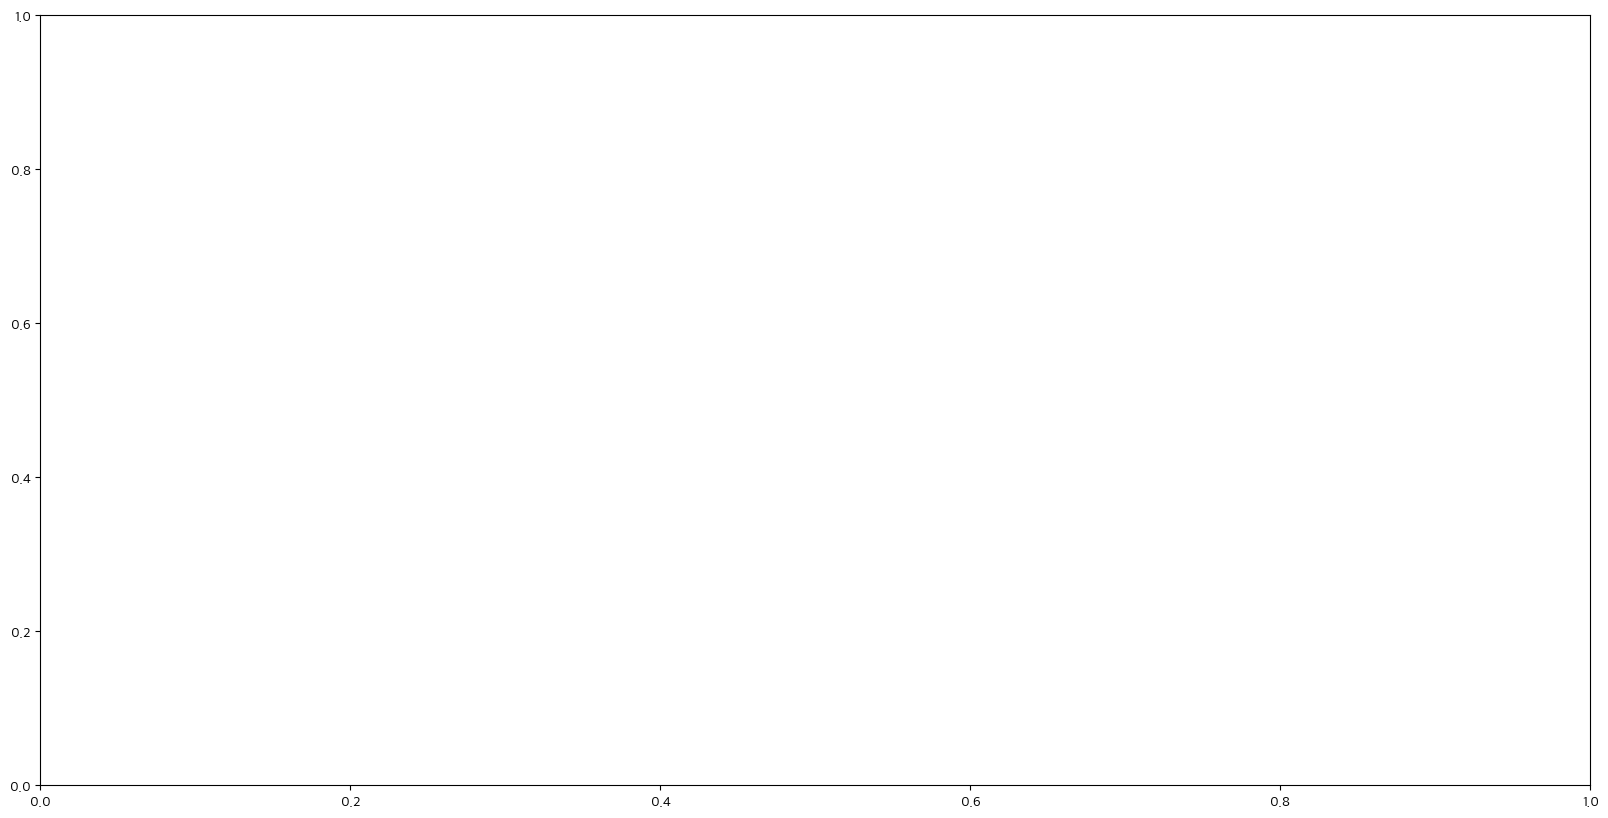

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from datetime import datetime, timedelta
from pytz import timezone

# 1. 데이터 전처리
def preprocess_data(directories):
    all_comments = []
    # 모든 CSV 파일에서 데이터 읽기
    for directory in directories:
        if not os.path.exists(directory):
            print(f"경고: '{directory}' 디렉토리를 찾을 수 없습니다.")
            continue
        for filename in os.listdir(directory):
            if filename.endswith('.csv'):
                file_path = os.path.join(directory, filename)
                try:
                    df = pd.read_csv(file_path)
    
                except Exception as e:
                    print(f"오류: '{file_path}' 파일을 읽는 중 문제가 발생했습니다: {str(e)}")

        for timestamp in df['Published At']:
            kst_time = utc_to_kst(timestamp)
            all_comments.append(kst_time)
    return all_comments

def utc_to_kst(utc_time):
    utc = timezone('UTC')
    kst = timezone('Asia/Seoul')
    utc_dt = utc.localize(datetime.strptime(utc_time, '%Y-%m-%dT%H:%M:%SZ'))
    return utc_dt.astimezone(kst)

# 2. 타임테이블 구조화
def create_timetable_structure():
    schedule_raw = '월요일 00:40 [교양] 100세 프로젝트 01:40 [교양] 오은영의 금쪽 상담소 스페셜 02:50 [교양] 채널A 스페셜 구해줘 전원주택 시즌31 03:50 [보도] 채널A 화재 특보 04:00 [교양] 채널A 스페셜 영국 왕립식물원, 큐가든의 사계 시즌2 04:50 [교양] 채널A 스페셜 DNA로 찾는 가족의 비밀 시즌3 06:00 [교양] 특별기획 더하기 빼기 프로젝트 칼슘의 이동 07:00 [예능] 미스테리야 시즌2 07:30 [교양] 행복한 아침 08:50 [예능] 요즘 남자 라이프 신랑수업 10:30 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 12:00 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 13:20 [교양] 꽃길만 걸어요 시즌2 14:20 [교양] 절친 토큐멘터리 4인용식탁 15:40 [예능] 아빠는 꽃중년 17:40 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 20:00 [교양] 절친 토큐멘터리 4인용식탁 21:20 [예능] 탐정들의 영업비밀 23:10 [교양] 폴킴의 커피 한 잔 할래요 화요일 00:30 [교양] 100세 프로젝트 01:30 [교양] 오은영의 금쪽 상담소 02:50 [교양] 채널A 스페셜 과거의 현장을 가다 시즌8 03:50 [보도] 채널A 화재 특보 04:00 [교양] 채널A 스페셜 세상의 모든 미스터리 시즌3 05:00 [교양] 채널A 스페셜 구해줘 전원주택 시즌31 06:00 [교양] 채널A 건강 스페셜 07:00 [예능] 미스테리야 시즌2 07:30 [교양] 행복한 아침 08:50 [교양] 김진의 돌직구 쇼 10:30 [예능] 남의 나라 살아요 선 넘은 패밀리 12:00 [보도] 뉴스A LIVE 13:20 [교양] 28청춘 14:20 [예능] 요즘 육아 금쪽같은 내새끼 15:50 [교양] 오은영의 금쪽 상담소 17:10 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 20:10 [교양] 100세 프로젝트 21:10 [예능] 성적을 부탁해 티처스 22:40 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 수요일 00:10 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 01:40 [교양] 채널A 스페셜 현대문명의 대전환 3 02:40 [교양] 채널A 스페셜 과거의 현장을 가다 시즌8 03:40 [보도] 채널A 지진 특보 03:50 [보도] 채널A 화재 특보 04:00 [교양] 채널A 스페셜 세상의 모든 미스터리 시즌3 05:00 [교양] 채널A 스페셜 구해줘 전원주택 시즌31 06:00 [교양] 순정시대 07:00 [예능] 미스테리야 시즌2 07:30 [교양] 행복한 아침 08:50 [교양] 김진의 돌직구 쇼 10:30 [예능] 요즘 남자 라이프 신랑수업 12:00 [보도] 뉴스A LIVE 13:20 [교양] 순정시대 14:20 [예능] 아빠는 꽃중년 15:50 [교양] 절친 토큐멘터리 4인용식탁 17:10 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 20:10 [예능] 탐정들의 영업비밀 스페셜 21:30 [예능] 요즘 남자 라이프 신랑수업 23:10 [예능] 남의 나라 살아요 선 넘은 패밀리 스페셜 목요일 00:30 [교양] 순정시대 01:30 [교양] 채널A 스페셜 과거의 현장을 가다 시즌8 02:30 [교양] 채널A 스페셜 드림 하우스 프로젝트 03:30 [교양] 채널A 스페셜 우주탐사 시즌5 04:00 [교양] 채널A 스페셜 세상의 모든 미스터리 시즌3 05:00 [교양] 채널A 스페셜 구해줘 전원주택 시즌31 06:00 [교양] 건강 스페셜 한양촌 07:00 [예능] 미스테리야 시즌2 07:30 [교양] 행복한 아침 08:50 [교양] 김진의 돌직구 쇼 10:30 [예능] 이제 만나러 갑니다 스페셜 12:00 [보도] 뉴스A LIVE 13:20 [교양] 100세 프로젝트 14:20 [교양] 도깨비 속담 캡처 14:50 [예능] 요즘 남자 라이프 신랑수업 스페셜 15:50 [예능] 탐정들의 영업비밀 스페셜 17:10 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 20:10 [교양] 오은영의 금쪽 상담소 21:30 [예능] 아빠는 꽃중년 23:40 [예능] 요즘 육아 금쪽같은 내새끼 금요일 00:30 [교양] 순정시대 01:30 [교양] 채널A 스페셜 현대문명의 대전환 3 02:50 [교양] 채널A 스페셜 자연사박물관 시즌1 03:40 [보도] 채널A 지진 특보 03:50 [보도] 채널A 화재 특보 04:00 [교양] 채널A 스페셜 람세스 2세의 잃어버린 도시 05:00 [교양] 채널A 스페셜 폼페이: 최후의 미스터리 06:00 [교양] 채널A 시청자마당 07:00 [예능] 거멍숲을 지켜라! 버디프렌즈 07:30 [교양] 행복한 아침 08:50 [교양] 김진의 돌직구 쇼 10:30 [교양] 절친 토큐멘터리 4인용식탁 11:50 [보도] 뉴스A LIVE 1부 13:10 [보도] 뉴스A LIVE 2부 13:20 [교양] 고두심이 좋아서 베스트 14:00 [예능] 채널A 스포츠 제17회 안성세계소프트테니스선수권대회 (혼합복식 결승) 15:50 [예능] 남의 나라 살아요 선 넘은 패밀리 스페셜 17:10 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 20:10 [예능] 요즘 육아 금쪽같은 내새끼 21:40 [예능] 남의 나라 살아요 선 넘은 패밀리 23:30 [예능] 아빠는 꽃중년 토요일 01:00 [예능] 성적을 부탁해 티처스 02:30 [교양] 채널A 스페셜 자연사박물관 시즌1 03:20 [교양] 채널A 스페셜 주말여행 산이 좋다 시즌2 04:00 [보도] 채널A 화재 특보 04:10 [교양] 채널A 스페셜 영국 왕립식물원, 큐가든의 사계 시즌1 05:00 [교양] 절친 토큐멘터리 4인용식탁 06:00 [교양] 순정시대 07:00 [교양] 28청춘 08:00 [교양] 아이Quiz 08:30 [예능] 거멍숲을 지켜라! 버디프렌즈 09:00 [교양] 꽃길만 걸어요 시즌2 10:00 [교양] 건강 스페셜 한양촌 11:00 [예능] 요즘 남자 라이프 신랑수업 스페셜 12:00 [교양] 토요 랭킹쇼 13:20 [예능] 성적을 부탁해 티처스 14:50 [예능] 아빠는 꽃중년 16:20 [교양] 절친 토큐멘터리 4인용식탁 17:40 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 19:50 [예능] 탐정들의 영업비밀 21:20 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 22:40 [예능] 요즘 육아 금쪽같은 내새끼 스페셜 일요일 00:00 [예능] 남의 나라 살아요 선 넘은 패밀리 01:30 [예능] 요즘 남자 라이프 신랑수업 03:00 [교양] 채널A 스페셜 영국 왕립식물원, 큐가든의 사계 시즌1 03:50 [보도] 채널A 화재 특보 04:00 [교양] 채널A 스페셜 웰컴투 별별실험실 04:40 [교양] 채널A 스페셜 영국 왕립식물원, 큐가든의 사계 시즌1 05:30 [교양] 채널A 스페셜 영국 왕립식물원, 큐가든의 사계 시즌1 06:20 [교양] 28청춘 07:20 [교양] 28청춘 08:20 [교양] 100세 프로젝트 09:20 [교양] 순정시대 10:20 [예능] 이제 만나러 갑니다 12:00 [보도] 뉴스A LIVE 13:20 [예능] 요즘 남자 라이프 신랑수업 14:50 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 16:10 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 17:40 [보도] 뉴스 TOP10 19:00 [보도] 뉴스A 19:50 [예능] 성적을 부탁해 티처스 21:20 [드라마] 채널A 토일드라마 새벽 2시의 신데렐라 22:40 [예능] 이제 만나러 갑니다 24:00 [종료]'

    # 문자열을 분리하여 리스트로 변환
    data_list = schedule_raw.split()

    # 변환된 데이터를 저장할 리스트
    schedule = []

    # 데이터 처리 (3개씩 묶어서 변환)
    for i in range(1, len(data_list) - 3, 3):
        start_time = data_list[i]  # 시작 시간
        end_time = data_list[i+3]  # 다음 프로그램의 시작 시간을 end 타임으로 사용
        program_name = f"{data_list[i+1]} {data_list[i+2]}"  # 프로그램명

        # 딕셔너리로 변환
        schedule.append({"start": start_time, "end": end_time, "program": program_name})

    # 마지막 프로그램의 end 시간을 24:00으로 설정
    schedule.append({
        "start": data_list[-3],
        "end": "24:00",
        "program": f"{data_list[-2]} {data_list[-1]}"
    })

    return schedule

# 3. 데이터 매칭
def match_comments_to_blocks(comments, timetable):
    block_counts = {block['program']: 0 for block in timetable}
    for comment_time in comments:
        for block in timetable:
            if block['start'] <= comment_time.strftime('%H:%M') < block['end']:
                block_counts[block['program']] += 1
                break
    return block_counts

# 4. 시각화
def visualize_timetable(timetable, block_counts):
    fig, ax = plt.subplots(figsize=(20, 10))
    
    # 그리드 그리기
    for block in timetable:
        # 각 블록을 사각형으로 표시
        rect = patches.Rectangle((x, y), width, height, fill=False)
        ax.add_patch(rect)
        
        # 댓글 수에 비례하는 원 그리기
        count = block_counts[block['program']]
        circle = patches.Circle((x_center, y_center), radius, color='red', alpha=0.5)
        ax.add_patch(circle)
    
    plt.title("프로그램별 댓글 분포")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('timetable_comment_distribution.png', dpi=300)
    plt.show()

# 메인 실행 코드
directories = ['디저스', '입시맘', '티처스 외전 및 티저']
comments = preprocess_data(directories)
timetable = create_timetable_structure()
block_counts = match_comments_to_blocks(comments, timetable)
visualize_timetable(timetable, block_counts)

# 5. 분석
max_comments_program = max(block_counts, key=block_counts.get)
print(f"가장 많은 댓글이 작성된 프로그램: {max_comments_program}")
print(f"댓글 수: {block_counts[max_comments_program]}")


In [ ]:
#타임테이블 산점도 그리기

import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# 1. 일주일 타임테이블 구조 생성
def create_weekly_timetable():
    days = ['월', '화', '수', '목', '금', '토', '일']
    hours = list(range(4, 24)) + list(range(0, 4))
    timetable = pd.DataFrame(index=days, columns=hours)
    return timetable

# 2. 유튜브 댓글 데이터 파싱
def parse_comments(comments_data):
    comments = []
    for comment in comments_data.split('\n'):
        parts = comment.split(',')
        if len(parts) == 4:
            timestamp = parts[3].strip()
            comments.append(datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%SZ"))
    return comments

# 3. 댓글 시간을 타임테이블에 매핑
def map_comments_to_timetable(comments, timetable):
    for comment_time in comments:
        day = comment_time.strftime('%a')
        hour = comment_time.hour
        if hour < 4:
            hour += 24
        if day in timetable.index and hour in timetable.columns:
            timetable.at[day, hour] = timetable.at[day, hour] + 1 if pd.notnull(timetable.at[day, hour]) else 1

# 4. 산점도 시각화
def visualize_comments_heatmap(timetable):
    plt.figure(figsize=(12, 6))
    for day in timetable.index:
        for hour in timetable.columns:
            count = timetable.at[day, hour]
            if pd.notnull(count):
                plt.scatter(hour, day, s=count*20, alpha=0.5)
    
    plt.title('YouTube 댓글 주간 히트맵')
    plt.xlabel('시간')
    plt.ylabel('요일')
    plt.xlim(0, 27)
    plt.xticks(range(0, 28, 2), [f"{h%24:02d}" for h in range(4, 32, 2)])
    plt.colorbar(label='댓글 수')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 메인 실행 코드
comments_data = """
@ganadara9900,아 쇼츠 편집 너무 잘해..스포츠 보듯이 쫄리고 카타르시스 느껴지게 하는 느낌. 방송 봐아겠다,2,2023-12-13T12:02:16Z
@user-mh3cu3me7x,부럽다 방송이라도,4,2023-11-15T15:52:13Z
@user-xr3kv4kg7q,무려 정승제쌤이랑 조정식쌤 단독 코칭...진짜 좋은 기회네요,15,2023-11-10T03:54:28Z
@user-rj6nj5bg7q,오호.. 나도 시험 보고 싶다,10,2023-10-24T15:28:18Z
"""

timetable = create_weekly_timetable()
comments = parse_comments(comments_data)
map_comments_to_timetable(comments, timetable)
visualize_comments_heatmap(timetable)

print(timetable)